In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import os
import json
import time
# Census API Key
from config import api_key
from config import g_key
import gmaps
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import seaborn as sns

In [2]:
#census_data = c.acs5.get().json()
query_url = f"https://api.census.gov/data/2019/acs/acs5"
display(query_url)
#https://api.census.gov/data#/2019/acs/acs5&{api_key}#?get=NAME,group(B01001)&for=us:1&key={api_key}

'https://api.census.gov/data/2019/acs/acs5'

In [3]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels

cols = ["Zipcode", "Household Income", "Population",
        "Median Contract Rent", "Median Gross Rent", "Median Home Value",
        "Median Monthly Owner Costs", "Year"]


years = [2014, 2019]
#years = [2015, 2015, 2016, 2017, 2018, 2019]
#years = [2019]
for year in years:

    c = Census(api_key, year=year)
    census_data = c.acs5.get(("NAME", "B19013_001E", 
                              "B01003_001E",
                              "B25058_001E",
                              "B25064_001E", 
                              "B25077_001E", 
                              "B25088_002E"), {'for': 'zip code tabulation area:*'})

    # Convert to DataFrame
    census_pd = pd.DataFrame(census_data)

    # Column Reordering
    census_pd = census_pd.rename(columns={"B19013_001E": f"Household Income_{year}",
                                          "B01003_001E": f"Population_{year}",
                                          "B25058_001E": f"Median Contract Rent_{year}",
                                          "B25064_001E": f"Median Gross Rent_{year}",
                                          "B25077_001E": f"Median Home Value_{year}",
                                          "B25088_002E": f"Median Monthly Owner Costs_{year}",
                                          "NAME": "Name",
                                          "zip code tabulation area": "Zipcode"})
    
    census_pd = census_pd.drop(columns=['Name'])
    # Final DataFrame
    
    
    if year==2014:
        df = census_pd
    if year==2019:
        df = df.merge(census_pd, how='inner', on=['Zipcode', 'state'])

# Visualize
#print(len(census_pd))
display(df.head())

,Household Income_2014,Population_2014,Median Contract Rent_2014,Median Gross Rent_2014,Median Home Value_2014,Median Monthly Owner Costs_2014,state,Zipcode,Household Income_2019,Population_2019,Median Contract Rent_2019,Median Gross Rent_2019,Median Home Value_2019,Median Monthly Owner Costs_2019
0,10833.0,18088.0,282.0,367.0,105400.0,722.0,72,00601,14361.0,17113.0,292.0,383.0,83900.0,771.0
1,16353.0,40859.0,329.0,411.0,91200.0,843.0,72,00602,16807.0,37751.0,293.0,400.0,85300.0,877.0
2,16323.0,53162.0,267.0,369.0,128700.0,841.0,72,00603,16049.0,47081.0,328.0,433.0,118400.0,832.0
3,14138.0,6415.0,234.0,326.0,105800.0,569.0,72,00606,12119.0,6392.0,196.0,275.0,80800.0,526.0
4,17265.0,28805.0,324.0,419.0,113700.0,752.0,72,00610,19898.0,26686.0,338.0,427.0,87600.0,751.0


In [4]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
df.to_csv("census_data.csv", encoding="utf-8", index=False)

In [5]:
!ls

Census_Demo.ipynb
Census_Demo_Barcharts.ipynb
Full_Census_Merge.csv
Full_Census_Merge_Metrics.csv
MSA_bottom_growth.csv
MSA_least_affordable.csv
MSA_top_growth_atl.csv
MSa_Agg.csv
README.md
Untitled.ipynb
__pycache__
api_keys.py
census_data.csv
census_data_2014Years.csv
census_data_2014_2019Years.csv
census_data_2017Years.csv
census_data_2019Years.csv
config.py
files
msa_top_growth_zip.csv
png1_test.png
test_mary.txt
untitled.txt


In [6]:
#create DataFrame for MSA
#https://www.roelpeters.be/solved-dtypewarning-columns-have-mixed-types-specify-dtype-option-on-import-or-set-low-memory-in-pandas/
msa_df = pd.read_csv('../project_1/files/ScanUSZipCode2017A.csv',low_memory=False)
msa_df

,ZIP,MA,MANAME
0,400,35620.0,New York-Newark-Jersey City NY-NJ-PA
1,501,35620.0,New York-Newark-Jersey City NY-NJ-PA
2,544,35620.0,New York-Newark-Jersey City NY-NJ-PA
3,1001,44140.0,Springfield MA
4,1002,44140.0,Springfield MA
...,...,...,...
40932,99926,NaN,NaN
40933,99927,NaN,NaN
40934,99928,NaN,NaN
40935,99929,NaN,NaN


In [7]:
#Comparing Data Types between the two diffrent dataframes to make certain they match for the merge
print(msa_df.dtypes)

ZIP         int64
MA        float64
MANAME     object
dtype: object


In [8]:
print(df.dtypes) 
    

Household Income_2014              float64
Population_2014                    float64
Median Contract Rent_2014          float64
Median Gross Rent_2014             float64
Median Home Value_2014             float64
Median Monthly Owner Costs_2014    float64
state                               object
Zipcode                             object
Household Income_2019              float64
Population_2019                    float64
Median Contract Rent_2019          float64
Median Gross Rent_2019             float64
Median Home Value_2019             float64
Median Monthly Owner Costs_2019    float64
dtype: object


In [9]:
#convert Zipcode datatype in concat_df to be int64
#https://www.kite.com/python/answers/how-to-convert-a-pandas-dataframe-column-from-object-to-int-in-python
df["Zipcode"] = df["Zipcode"].astype(object).astype(int)

In [10]:
#Rename ZIP column in MSA to match Zipcode from Census data
#https://note.nkmk.me/en/python-pandas-dataframe-rename/
msa_df.rename(columns={'ZIP': 'Zipcode'}, inplace=True)


In [11]:
#Merge data frames and drop the values in the census data with -666666666
merged_census_df = pd.merge(df, msa_df, how="left", on=["Zipcode", "Zipcode"])
merged_census_df
merged_census_df.drop(merged_census_df[merged_census_df["Household Income_2014"] == -666666666].index, inplace = True)
merged_census_df.drop(merged_census_df[merged_census_df["Population_2014"] == -666666666].index, inplace = True)
merged_census_df.drop(merged_census_df[merged_census_df["Median Contract Rent_2014"] == -666666666].index, inplace = True)
merged_census_df.drop(merged_census_df[merged_census_df["Median Gross Rent_2014"] == -666666666].index, inplace = True)
merged_census_df.drop(merged_census_df[merged_census_df["Median Home Value_2014"] == -666666666].index, inplace = True)       
merged_census_df.drop(merged_census_df[merged_census_df["Median Monthly Owner Costs_2014"] == -666666666].index, inplace = True) 
merged_census_df.drop(merged_census_df[merged_census_df["Household Income_2019"] == -666666666].index, inplace = True)
merged_census_df.drop(merged_census_df[merged_census_df["Population_2019"] == -666666666].index, inplace = True)
merged_census_df.drop(merged_census_df[merged_census_df["Median Contract Rent_2019"] == -666666666].index, inplace = True)
merged_census_df.drop(merged_census_df[merged_census_df["Median Gross Rent_2019"] == -666666666].index, inplace = True)
merged_census_df.drop(merged_census_df[merged_census_df["Median Home Value_2019"] == -666666666].index, inplace = True)       
merged_census_df.drop(merged_census_df[merged_census_df["Median Monthly Owner Costs_2019"] == -666666666].index, inplace = True)

 

In [12]:
# Save as a csv to check full data set
# Note to avoid any issues later, use encoding="utf-8"
merged_census_df.to_csv("census_data_2014_2019Years.csv", encoding="utf-8", index=False)

In [13]:
# Remove zips with no MA
merged_census_df['MA'].replace('', np.nan, inplace = True)
merged_census_df.dropna(subset=['MA'], inplace=True)
merged_census_df.head()

,Household Income_2014,Population_2014,Median Contract Rent_2014,Median Gross Rent_2014,Median Home Value_2014,Median Monthly Owner Costs_2014,state,Zipcode,Household Income_2019,Population_2019,Median Contract Rent_2019,Median Gross Rent_2019,Median Home Value_2019,Median Monthly Owner Costs_2019,MA,MANAME
131,60775.0,17141.0,800.0,895.0,212900.0,1586.0,25,1001,63949.0,17312.0,1025.0,1148.0,215700.0,1506.0,44140.0,Springfield MA
132,55082.0,29844.0,1026.0,1117.0,341600.0,2094.0,25,1002,61159.0,30014.0,1280.0,1380.0,355500.0,2330.0,44140.0,Springfield MA
134,68361.0,5113.0,753.0,906.0,208000.0,1642.0,25,1005,67302.0,5128.0,831.0,965.0,236400.0,1555.0,49340.0,Worcester MA-CT
135,74221.0,14774.0,755.0,876.0,255800.0,1795.0,25,1007,91191.0,15005.0,909.0,975.0,276900.0,1884.0,44140.0,Springfield MA
138,82365.0,3667.0,615.0,683.0,270400.0,1693.0,25,1010,70063.0,3658.0,703.0,703.0,272200.0,1880.0,44140.0,Springfield MA


In [14]:
# Create dataframe of home ownership
msa_home_ownership = pd.read_csv('../project_1/files/Census_Home_Ownership.csv',low_memory=False)
msa_home_ownership


,MANAME,2009 H%,2010 H%,2011 H%,2012 H%,2013 H%,2014 H%,2015 H%,2016 H%,2017 H%,2018 H%,2019 H%,2020 H%
0,Inside Metropolitan Statistical Areas,65.9,65.4,64.6,63.9,63.4,62.9,62.2,61.9,62.3,62.9,63.1,65.2
1,Akron OH,74.0,74.9,67.5,65.6,70.8,69.5,77.1,76.9,70.9,70.0,66.0,69.0
2,Albany-Schenectady-Troy NY,65.9,61.3,64.1,62.2,61.2,63.7,71.1,72.8,72.4,70.6,67.9,67.5
3,Albuquerque NM,64.3,66.9,67.0,67.9,70.0,69.5,65.7,65.5,67.1,62.8,65.9,64.4
4,Allentown-Bethlehem-Easton PA-NJ,69.2,68.9,73.1,72.1,67.8,68.8,72.4,71.5,75.7,75.5,71.5,68.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Tucson AZ,61.4,56.0,60.1,63.8,60.1,67.1,65.5,64.3,67.2,64.9,66.1,66.7
66,Tulsa OK,65.2,65.4,66.8,68.3,70.5,70.1,67.8,64.2,64.4,66.5,64.1,65.3
67,Virginia Beach-Norfolk-Newport News VA-N,59.4,59.6,65.3,62.8,63.0,65.8,63.5,61.4,62.3,62.0,63.3,64.1
68,Washington-Arlington-Alexandria DC-VA-MD,64.6,63.1,63.3,62.9,64.7,67.9,67.2,67.3,67.6,66.9,66.0,65.0


In [15]:
# Merge census home ownership with existing data
full_census_merge = pd.merge(merged_census_df, msa_home_ownership, how="left", on=["MANAME", "MANAME"])
full_census_merge

,Household Income_2014,Population_2014,Median Contract Rent_2014,Median Gross Rent_2014,Median Home Value_2014,Median Monthly Owner Costs_2014,state,Zipcode,Household Income_2019,Population_2019,...,2011 H%,2012 H%,2013 H%,2014 H%,2015 H%,2016 H%,2017 H%,2018 H%,2019 H%,2020 H%
0,60775.0,17141.0,800.0,895.0,212900.0,1586.0,25,1001,63949.0,17312.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55082.0,29844.0,1026.0,1117.0,341600.0,2094.0,25,1002,61159.0,30014.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68361.0,5113.0,753.0,906.0,208000.0,1642.0,25,1005,67302.0,5128.0,...,64.9,63.4,62.7,65.9,64.4,64.1,65.8,61.9,63.3,62.5
3,74221.0,14774.0,755.0,876.0,255800.0,1795.0,25,1007,91191.0,15005.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82365.0,3667.0,615.0,683.0,270400.0,1693.0,25,1010,70063.0,3658.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16653,55268.0,18575.0,982.0,1097.0,187000.0,1883.0,02,99701,59955.0,17258.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16654,76085.0,24311.0,1151.0,1377.0,208900.0,1902.0,02,99705,80875.0,23131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16655,73871.0,31658.0,944.0,1041.0,227600.0,1870.0,02,99709,87055.0,29288.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16656,88517.0,12134.0,1000.0,1250.0,236400.0,1924.0,02,99712,88502.0,14837.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Filter out zips not contained in top 75 largest MSAs
full_census_merge.dropna(inplace=True)
full_census_merge

,Household Income_2014,Population_2014,Median Contract Rent_2014,Median Gross Rent_2014,Median Home Value_2014,Median Monthly Owner Costs_2014,state,Zipcode,Household Income_2019,Population_2019,...,2011 H%,2012 H%,2013 H%,2014 H%,2015 H%,2016 H%,2017 H%,2018 H%,2019 H%,2020 H%
2,68361.0,5113.0,753.0,906.0,208000.0,1642.0,25,1005,67302.0,5128.0,...,64.9,63.4,62.7,65.9,64.4,64.1,65.8,61.9,63.3,62.5
14,43583.0,1389.0,599.0,758.0,196800.0,1473.0,25,1031,38173.0,1135.0,...,64.9,63.4,62.7,65.9,64.4,64.1,65.8,61.9,63.3,62.5
29,80577.0,1791.0,775.0,1039.0,257100.0,1757.0,25,1068,88571.0,1833.0,...,64.9,63.4,62.7,65.9,64.4,64.1,65.8,61.9,63.3,62.5
40,37126.0,3108.0,665.0,823.0,199600.0,1573.0,25,1083,60323.0,3094.0,...,64.9,63.4,62.7,65.9,64.4,64.1,65.8,61.9,63.3,62.5
44,48679.0,1078.0,538.0,538.0,250600.0,1487.0,25,1092,108725.0,1278.0,...,64.9,63.4,62.7,65.9,64.4,64.1,65.8,61.9,63.3,62.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16509,59325.0,56326.0,900.0,1036.0,185100.0,1538.0,53,98682,75634.0,60887.0,...,61.1,59.2,60.0,62.5,64.0,63.7,63.7,63.9,60.9,59.8
16510,58874.0,31908.0,866.0,986.0,250200.0,1741.0,53,98683,70099.0,33219.0,...,61.1,59.2,60.0,62.5,64.0,63.7,63.7,63.9,60.9,59.8
16511,57216.0,27442.0,913.0,1065.0,208100.0,1521.0,53,98684,66781.0,29396.0,...,61.1,59.2,60.0,62.5,64.0,63.7,63.7,63.9,60.9,59.8
16512,79265.0,26954.0,1058.0,1249.0,257100.0,1856.0,53,98685,103120.0,29792.0,...,61.1,59.2,60.0,62.5,64.0,63.7,63.7,63.9,60.9,59.8


In [17]:
# Check curreent dataframe types
print(full_census_merge.dtypes)

Household Income_2014              float64
Population_2014                    float64
Median Contract Rent_2014          float64
Median Gross Rent_2014             float64
Median Home Value_2014             float64
Median Monthly Owner Costs_2014    float64
state                               object
Zipcode                              int32
Household Income_2019              float64
Population_2019                    float64
Median Contract Rent_2019          float64
Median Gross Rent_2019             float64
Median Home Value_2019             float64
Median Monthly Owner Costs_2019    float64
MA                                 float64
MANAME                              object
2009 H%                            float64
2010 H%                            float64
2011 H%                            float64
2012 H%                            float64
2013 H%                            float64
2014 H%                            float64
2015 H%                            float64
2016 H%    

In [18]:
# Convert median monthly owner cost to integer
###############ERIC, the main data frame is called df.  Also, the columns are the original names is _2014 and _2019 as a suffix
full_census_merge["Median Monthly Owner Costs_2014"] = full_census_merge["Median Monthly Owner Costs_2014"].astype(object).astype(float)
full_census_merge["Median Monthly Owner Costs_2019"] = full_census_merge["Median Monthly Owner Costs_2019"].astype(object).astype(float)

In [19]:
# Confirm data type conversion
print(full_census_merge.dtypes)

Household Income_2014              float64
Population_2014                    float64
Median Contract Rent_2014          float64
Median Gross Rent_2014             float64
Median Home Value_2014             float64
Median Monthly Owner Costs_2014    float64
state                               object
Zipcode                              int32
Household Income_2019              float64
Population_2019                    float64
Median Contract Rent_2019          float64
Median Gross Rent_2019             float64
Median Home Value_2019             float64
Median Monthly Owner Costs_2019    float64
MA                                 float64
MANAME                              object
2009 H%                            float64
2010 H%                            float64
2011 H%                            float64
2012 H%                            float64
2013 H%                            float64
2014 H%                            float64
2015 H%                            float64
2016 H%    

In [20]:
# Create homeowner % averages
full_census_merge["Average H%_2014"] = full_census_merge[['2010 H%','2011 H%','2012 H%','2013 H%','2014 H%']].mean(axis=1)
full_census_merge["Average H%_2019"] = full_census_merge[['2015 H%','2016 H%','2017 H%','2018 H%','2019 H%']].mean(axis=1)

In [21]:
# Create weighted cost column
full_census_merge["Weighted Cost_2014"] = full_census_merge["Median Gross Rent_2014"] * (1-full_census_merge["Average H%_2014"] / 100) + full_census_merge["Median Monthly Owner Costs_2014"] * full_census_merge["Average H%_2014"] / 100
full_census_merge["Weighted Cost_2019"] = full_census_merge["Median Gross Rent_2019"] * (1-full_census_merge["Average H%_2019"] / 100) + full_census_merge["Median Monthly Owner Costs_2019"] * full_census_merge["Average H%_2019"] / 100
full_census_merge

,Household Income_2014,Population_2014,Median Contract Rent_2014,Median Gross Rent_2014,Median Home Value_2014,Median Monthly Owner Costs_2014,state,Zipcode,Household Income_2019,Population_2019,...,2015 H%,2016 H%,2017 H%,2018 H%,2019 H%,2020 H%,Average H%_2014,Average H%_2019,Weighted Cost_2014,Weighted Cost_2019
2,68361.0,5113.0,753.0,906.0,208000.0,1642.0,25,1005,67302.0,5128.0,...,64.4,64.1,65.8,61.9,63.3,62.5,64.48,63.90,1380.5728,1342.0100
14,43583.0,1389.0,599.0,758.0,196800.0,1473.0,25,1031,38173.0,1135.0,...,64.4,64.1,65.8,61.9,63.3,62.5,64.48,63.90,1219.0320,1219.8610
29,80577.0,1791.0,775.0,1039.0,257100.0,1757.0,25,1068,88571.0,1833.0,...,64.4,64.1,65.8,61.9,63.3,62.5,64.48,63.90,1501.9664,1642.4740
40,37126.0,3108.0,665.0,823.0,199600.0,1573.0,25,1083,60323.0,3094.0,...,64.4,64.1,65.8,61.9,63.3,62.5,64.48,63.90,1306.6000,1168.9180
44,48679.0,1078.0,538.0,538.0,250600.0,1487.0,25,1092,108725.0,1278.0,...,64.4,64.1,65.8,61.9,63.3,62.5,64.48,63.90,1149.9152,1320.3130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16509,59325.0,56326.0,900.0,1036.0,185100.0,1538.0,53,98682,75634.0,60887.0,...,64.0,63.7,63.7,63.9,60.9,59.8,60.92,63.24,1341.8184,1553.8352
16510,58874.0,31908.0,866.0,986.0,250200.0,1741.0,53,98683,70099.0,33219.0,...,64.0,63.7,63.7,63.9,60.9,59.8,60.92,63.24,1445.9460,1617.3712
16511,57216.0,27442.0,913.0,1065.0,208100.0,1521.0,53,98684,66781.0,29396.0,...,64.0,63.7,63.7,63.9,60.9,59.8,60.92,63.24,1342.7952,1570.6296
16512,79265.0,26954.0,1058.0,1249.0,257100.0,1856.0,53,98685,103120.0,29792.0,...,64.0,63.7,63.7,63.9,60.9,59.8,60.92,63.24,1618.7844,1785.2000


In [22]:
# Create Affordability Index
full_census_merge["Affordability_2014"] = full_census_merge["Weighted Cost_2014"] / full_census_merge["Household Income_2014"] * 12
full_census_merge["Affordability_2019"] = full_census_merge["Weighted Cost_2019"] / full_census_merge["Household Income_2019"] * 12
full_census_merge

,Household Income_2014,Population_2014,Median Contract Rent_2014,Median Gross Rent_2014,Median Home Value_2014,Median Monthly Owner Costs_2014,state,Zipcode,Household Income_2019,Population_2019,...,2017 H%,2018 H%,2019 H%,2020 H%,Average H%_2014,Average H%_2019,Weighted Cost_2014,Weighted Cost_2019,Affordability_2014,Affordability_2019
2,68361.0,5113.0,753.0,906.0,208000.0,1642.0,25,1005,67302.0,5128.0,...,65.8,61.9,63.3,62.5,64.48,63.90,1380.5728,1342.0100,0.242344,0.239281
14,43583.0,1389.0,599.0,758.0,196800.0,1473.0,25,1031,38173.0,1135.0,...,65.8,61.9,63.3,62.5,64.48,63.90,1219.0320,1219.8610,0.335644,0.383473
29,80577.0,1791.0,775.0,1039.0,257100.0,1757.0,25,1068,88571.0,1833.0,...,65.8,61.9,63.3,62.5,64.48,63.90,1501.9664,1642.4740,0.223682,0.222530
40,37126.0,3108.0,665.0,823.0,199600.0,1573.0,25,1083,60323.0,3094.0,...,65.8,61.9,63.3,62.5,64.48,63.90,1306.6000,1168.9180,0.422324,0.232532
44,48679.0,1078.0,538.0,538.0,250600.0,1487.0,25,1092,108725.0,1278.0,...,65.8,61.9,63.3,62.5,64.48,63.90,1149.9152,1320.3130,0.283469,0.145723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16509,59325.0,56326.0,900.0,1036.0,185100.0,1538.0,53,98682,75634.0,60887.0,...,63.7,63.9,60.9,59.8,60.92,63.24,1341.8184,1553.8352,0.271417,0.246530
16510,58874.0,31908.0,866.0,986.0,250200.0,1741.0,53,98683,70099.0,33219.0,...,63.7,63.9,60.9,59.8,60.92,63.24,1445.9460,1617.3712,0.294720,0.276872
16511,57216.0,27442.0,913.0,1065.0,208100.0,1521.0,53,98684,66781.0,29396.0,...,63.7,63.9,60.9,59.8,60.92,63.24,1342.7952,1570.6296,0.281627,0.282229
16512,79265.0,26954.0,1058.0,1249.0,257100.0,1856.0,53,98685,103120.0,29792.0,...,63.7,63.9,60.9,59.8,60.92,63.24,1618.7844,1785.2000,0.245069,0.207742


In [23]:
full_census_merge.to_csv("Full_Census_Merge.csv", encoding="utf-8", index=False)

In [24]:
# Add population growth metrics by zip code
full_census_merge["Population Growth"] = full_census_merge["Population_2019"] - full_census_merge["Population_2014"]
full_census_merge["Population Growth %"] = full_census_merge["Population Growth"] / full_census_merge["Population_2014"]

In [25]:
# Add change in income metric by zip code
full_census_merge["Change in Income"] = full_census_merge["Household Income_2019"] - full_census_merge["Household Income_2014"]
full_census_merge["Change in Income %"] = full_census_merge["Change in Income"] / full_census_merge["Household Income_2014"]

In [26]:
# Add change in Weighted Cost
full_census_merge["Change in Weighted Cost"] = full_census_merge["Weighted Cost_2019"] - full_census_merge["Weighted Cost_2014"]
full_census_merge["Change in Weighted Cost %"] = full_census_merge["Change in Weighted Cost"] / full_census_merge["Weighted Cost_2014"]
full_census_merge

,Household Income_2014,Population_2014,Median Contract Rent_2014,Median Gross Rent_2014,Median Home Value_2014,Median Monthly Owner Costs_2014,state,Zipcode,Household Income_2019,Population_2019,...,Weighted Cost_2014,Weighted Cost_2019,Affordability_2014,Affordability_2019,Population Growth,Population Growth %,Change in Income,Change in Income %,Change in Weighted Cost,Change in Weighted Cost %
2,68361.0,5113.0,753.0,906.0,208000.0,1642.0,25,1005,67302.0,5128.0,...,1380.5728,1342.0100,0.242344,0.239281,15.0,0.002934,-1059.0,-0.015491,-38.5628,-0.027932
14,43583.0,1389.0,599.0,758.0,196800.0,1473.0,25,1031,38173.0,1135.0,...,1219.0320,1219.8610,0.335644,0.383473,-254.0,-0.182865,-5410.0,-0.124131,0.8290,0.000680
29,80577.0,1791.0,775.0,1039.0,257100.0,1757.0,25,1068,88571.0,1833.0,...,1501.9664,1642.4740,0.223682,0.222530,42.0,0.023451,7994.0,0.099209,140.5076,0.093549
40,37126.0,3108.0,665.0,823.0,199600.0,1573.0,25,1083,60323.0,3094.0,...,1306.6000,1168.9180,0.422324,0.232532,-14.0,-0.004505,23197.0,0.624818,-137.6820,-0.105374
44,48679.0,1078.0,538.0,538.0,250600.0,1487.0,25,1092,108725.0,1278.0,...,1149.9152,1320.3130,0.283469,0.145723,200.0,0.185529,60046.0,1.233509,170.3978,0.148183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16509,59325.0,56326.0,900.0,1036.0,185100.0,1538.0,53,98682,75634.0,60887.0,...,1341.8184,1553.8352,0.271417,0.246530,4561.0,0.080975,16309.0,0.274909,212.0168,0.158007
16510,58874.0,31908.0,866.0,986.0,250200.0,1741.0,53,98683,70099.0,33219.0,...,1445.9460,1617.3712,0.294720,0.276872,1311.0,0.041087,11225.0,0.190661,171.4252,0.118556
16511,57216.0,27442.0,913.0,1065.0,208100.0,1521.0,53,98684,66781.0,29396.0,...,1342.7952,1570.6296,0.281627,0.282229,1954.0,0.071205,9565.0,0.167174,227.8344,0.169672
16512,79265.0,26954.0,1058.0,1249.0,257100.0,1856.0,53,98685,103120.0,29792.0,...,1618.7844,1785.2000,0.245069,0.207742,2838.0,0.105290,23855.0,0.300953,166.4156,0.102803


In [27]:
# Add change in Affordability
full_census_merge["Change in Affordability"] = full_census_merge["Affordability_2019"] - full_census_merge["Affordability_2014"]
full_census_merge["Change in Affordability %"] = full_census_merge["Change in Affordability"] / full_census_merge["Affordability_2014"]

In [28]:
full_census_merge.to_csv("Full_Census_Merge_Metrics.csv", encoding="utf-8", index=False)

In [29]:
MSA_agg = full_census_merge.groupby(['MANAME']).agg(
    Zip_count = ('Zipcode','count'),
    Population_2014 = ('Population_2014','sum'),
    Population_2019 = ('Population_2019','sum'),
    Population_growth = ('Population Growth','sum'),
    Affordability_2019 = ('Affordability_2019','mean'),
    Income_Growth = ('Change in Income %', 'mean'),
    Weighted_Cost_Change = ('Change in Weighted Cost %','mean'),
    Affordability_Change = ('Change in Affordability %','mean')
).reset_index()    

MSA_agg

,MANAME,Zip_count,Population_2014,Population_2019,Population_growth,Affordability_2019,Income_Growth,Weighted_Cost_Change,Affordability_Change
0,Akron OH,44,684698.0,684197.0,-501.0,0.251995,0.150071,0.015408,-0.112078
1,Albany-Schenectady-Troy NY,97,901947.0,904693.0,2746.0,0.260619,0.153546,0.104488,-0.027628
2,Albuquerque NM,41,889636.0,901623.0,11987.0,0.270181,0.104422,0.050645,-0.027977
3,Allentown-Bethlehem-Easton PA-NJ,64,831644.0,842025.0,10381.0,0.265437,0.152977,0.044326,-0.080851
4,Atlanta-Sandy Springs-Roswell GA,209,5555104.0,5971385.0,416281.0,0.257001,0.199617,0.047287,-0.116082
...,...,...,...,...,...,...,...,...,...
64,Tucson AZ,37,978564.0,1010951.0,32387.0,0.266035,0.149762,0.039751,-0.091046
65,Tulsa OK,95,1079049.0,1112119.0,33070.0,0.244363,0.128667,0.060656,-0.050574
66,Virginia Beach-Norfolk-Newport News VA-N,80,1668548.0,1687644.0,19096.0,0.276800,0.134159,0.028774,-0.076847
67,Washington-Arlington-Alexandria DC-VA-MD,264,5838956.0,6164488.0,325532.0,0.251348,0.147875,0.077727,-0.051700


In [30]:
MSA_agg["Population_growth_%"] = MSA_agg["Population_growth"] / MSA_agg["Population_2014"]
MSA_agg

,MANAME,Zip_count,Population_2014,Population_2019,Population_growth,Affordability_2019,Income_Growth,Weighted_Cost_Change,Affordability_Change,Population_growth_%
0,Akron OH,44,684698.0,684197.0,-501.0,0.251995,0.150071,0.015408,-0.112078,-0.000732
1,Albany-Schenectady-Troy NY,97,901947.0,904693.0,2746.0,0.260619,0.153546,0.104488,-0.027628,0.003045
2,Albuquerque NM,41,889636.0,901623.0,11987.0,0.270181,0.104422,0.050645,-0.027977,0.013474
3,Allentown-Bethlehem-Easton PA-NJ,64,831644.0,842025.0,10381.0,0.265437,0.152977,0.044326,-0.080851,0.012483
4,Atlanta-Sandy Springs-Roswell GA,209,5555104.0,5971385.0,416281.0,0.257001,0.199617,0.047287,-0.116082,0.074937
...,...,...,...,...,...,...,...,...,...,...
64,Tucson AZ,37,978564.0,1010951.0,32387.0,0.266035,0.149762,0.039751,-0.091046,0.033096
65,Tulsa OK,95,1079049.0,1112119.0,33070.0,0.244363,0.128667,0.060656,-0.050574,0.030647
66,Virginia Beach-Norfolk-Newport News VA-N,80,1668548.0,1687644.0,19096.0,0.276800,0.134159,0.028774,-0.076847,0.011445
67,Washington-Arlington-Alexandria DC-VA-MD,264,5838956.0,6164488.0,325532.0,0.251348,0.147875,0.077727,-0.051700,0.055752


In [31]:
MSA_agg.to_csv("MSA_Agg.csv", encoding="utf-8", index=False)

In [32]:
MSA_top_growth=MSA_agg.nlargest(5,'Population_growth_%')
MSA_top_growth

,MANAME,Zip_count,Population_2014,Population_2019,Population_growth,Affordability_2019,Income_Growth,Weighted_Cost_Change,Affordability_Change,Population_growth_%
5,Austin-Round Rock TX,89,1872353.0,2153701.0,281348.0,0.270516,0.245999,0.188995,-0.034643,0.150264
43,Orlando-Kissimmee-Sanford FL,86,2238232.0,2518808.0,280576.0,0.284446,0.209742,0.086730,-0.096054,0.125356
49,Raleigh NC,52,1301248.0,1445848.0,144600.0,0.236404,0.220882,0.072614,-0.108987,0.111124
26,Houston-The Woodlands-Sugar Land TX,217,6266447.0,6938112.0,671665.0,0.278124,0.155337,0.126357,-0.013703,0.107184
55,San Antonio-New Braunfels TX,102,2241655.0,2473877.0,232222.0,0.267009,0.140645,0.163229,0.029723,0.103594


In [33]:
#Data Frame to include atlanta in top 5 comparison
MSA_top_growth_atl = MSA_top_growth.append(MSA_agg[MSA_agg["MANAME"]=="Atlanta-Sandy Springs-Roswell GA"])
MSA_top_growth_atl

,MANAME,Zip_count,Population_2014,Population_2019,Population_growth,Affordability_2019,Income_Growth,Weighted_Cost_Change,Affordability_Change,Population_growth_%
5,Austin-Round Rock TX,89,1872353.0,2153701.0,281348.0,0.270516,0.245999,0.188995,-0.034643,0.150264
43,Orlando-Kissimmee-Sanford FL,86,2238232.0,2518808.0,280576.0,0.284446,0.209742,0.086730,-0.096054,0.125356
49,Raleigh NC,52,1301248.0,1445848.0,144600.0,0.236404,0.220882,0.072614,-0.108987,0.111124
26,Houston-The Woodlands-Sugar Land TX,217,6266447.0,6938112.0,671665.0,0.278124,0.155337,0.126357,-0.013703,0.107184
55,San Antonio-New Braunfels TX,102,2241655.0,2473877.0,232222.0,0.267009,0.140645,0.163229,0.029723,0.103594
4,Atlanta-Sandy Springs-Roswell GA,209,5555104.0,5971385.0,416281.0,0.257001,0.199617,0.047287,-0.116082,0.074937


In [34]:
#Create DF for Bar Graph to identify 5 slowest growing
MSA_bottom_growth = MSA_agg.nsmallest(5,'Population_growth_%')
MSA_bottom_growth

,MANAME,Zip_count,Population_2014,Population_2019,Population_growth,Affordability_2019,Income_Growth,Weighted_Cost_Change,Affordability_Change,Population_growth_%
46,Pittsburgh PA,285,2415050.0,2378155.0,-36895.0,0.234913,0.183587,0.079956,-0.055821,-0.015277
61,Syracuse NY,80,720317.0,709499.0,-10818.0,0.228460,0.169797,0.035449,-0.099320,-0.015018
52,Rochester NY,105,1133338.0,1121962.0,-11376.0,0.238324,0.141355,0.078086,-0.048770,-0.010038
63,Toledo OH,64,661736.0,655940.0,-5796.0,0.227599,0.178999,0.011475,-0.132945,-0.008759
25,Hartford-West Hartford-East Hartford CT,81,1194084.0,1184375.0,-9709.0,0.262795,0.139848,0.058734,-0.062996,-0.008131


In [35]:
#Create DF for Bar Graph to identify 3 least affordable
MSA_least_affordable=MSA_agg.nlargest(3,'Affordability_2019')
MSA_least_affordable

,MANAME,Zip_count,Population_2014,Population_2019,Population_growth,Affordability_2019,Income_Growth,Weighted_Cost_Change,Affordability_Change,Population_growth_%
34,Miami-Fort Lauderdale-West Palm Beach FL,181,5799992.0,6115562.0,315570.0,0.355004,0.199829,0.111752,-0.065537,0.054409
31,Los Angeles-Long Beach-Anaheim CA,359,13048701.0,13237188.0,188487.0,0.351986,0.214925,0.132145,-0.061131,0.014445
56,San Diego-Carlsbad CA,91,3154200.0,3285371.0,131171.0,0.325995,0.223041,0.122730,-0.066062,0.041586


In [36]:
# Export CSV's for analysis
MSA_top_growth_atl.to_csv("MSA_top_growth_atl.csv", encoding="utf-8", index=False)
MSA_bottom_growth.to_csv("MSA_bottom_growth.csv", encoding="utf-8", index=False)
MSA_least_affordable.to_csv("MSA_least_affordable.csv", encoding="utf-8", index=False)

In [37]:
top_msa_name = ["Austin-Round Rock TX", "Orlando-Kissimmee-Sanford FL", "Raleigh NC", "Houston-The Woodlands-Sugar Land TX", "San Antonio-New Braunfels TX", "Atlanta-Sandy Springs-Roswell GA"]


In [38]:
msa_top_growth_zip = full_census_merge[full_census_merge.MANAME.isin(top_msa_name)]
msa_top_growth_zip

,Household Income_2014,Population_2014,Median Contract Rent_2014,Median Gross Rent_2014,Median Home Value_2014,Median Monthly Owner Costs_2014,state,Zipcode,Household Income_2019,Population_2019,...,Affordability_2014,Affordability_2019,Population Growth,Population Growth %,Change in Income,Change in Income %,Change in Weighted Cost,Change in Weighted Cost %,Change in Affordability,Change in Affordability %
4411,51121.0,18121.0,549.0,717.0,145400.0,1271.0,37,27501,57271.0,21055.0,...,0.254188,0.239935,2934.0,0.161912,6150.0,0.120303,62.2504,0.057487,-0.014252,-0.056070
4412,95857.0,33385.0,931.0,1102.0,267800.0,1709.0,37,27502,115685.0,41455.0,...,0.188138,0.178354,8070.0,0.241725,19828.0,0.206850,216.5422,0.144086,-0.009784,-0.052006
4414,45316.0,14891.0,579.0,797.0,130700.0,1112.0,37,27504,50911.0,15593.0,...,0.266138,0.235402,702.0,0.047143,5595.0,0.123466,-6.3130,-0.006281,-0.030736,-0.115489
4415,31393.0,1802.0,335.0,488.0,89700.0,1294.0,37,27508,54375.0,1413.0,...,0.390004,0.184753,-389.0,-0.215871,22982.0,0.732074,-183.1184,-0.179478,-0.205250,-0.526278
4417,67392.0,33897.0,735.0,879.0,209600.0,1472.0,37,27511,78182.0,34078.0,...,0.226250,0.210202,181.0,0.005340,10790.0,0.160108,98.8868,0.077826,-0.016047,-0.070926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,41972.0,2962.0,369.0,570.0,124700.0,1068.0,48,78941,60625.0,2709.0,...,0.246287,0.201944,-253.0,-0.085415,18653.0,0.444415,158.8060,0.184352,-0.044343,-0.180048
13575,48071.0,2951.0,534.0,781.0,166400.0,1784.0,48,78950,54292.0,1810.0,...,0.347493,0.245834,-1141.0,-0.386649,6221.0,0.129413,-279.7926,-0.200996,-0.101659,-0.292550
13576,44589.0,861.0,350.0,550.0,88700.0,789.0,48,78953,70069.0,701.0,...,0.185659,0.225487,-160.0,-0.185830,25480.0,0.571441,626.7726,0.908547,0.039828,0.214520
13577,39746.0,8746.0,552.0,795.0,110100.0,1191.0,48,78957,58446.0,9699.0,...,0.309990,0.269650,953.0,0.108964,18700.0,0.470488,286.5916,0.279128,-0.040340,-0.130133


In [39]:
msa_top_growth_zip.to_csv("msa_top_growth_zip.csv", encoding="utf-8", index=False)

In [40]:
#Data Frame to include atlanta in top 5 comparison
MSA_top_growth_atl = MSA_top_growth.append(MSA_agg[MSA_agg["MANAME"]=="Atlanta-Sandy Springs-Roswell GA"])
MSA_top_growth_atl

,MANAME,Zip_count,Population_2014,Population_2019,Population_growth,Affordability_2019,Income_Growth,Weighted_Cost_Change,Affordability_Change,Population_growth_%
5,Austin-Round Rock TX,89,1872353.0,2153701.0,281348.0,0.270516,0.245999,0.188995,-0.034643,0.150264
43,Orlando-Kissimmee-Sanford FL,86,2238232.0,2518808.0,280576.0,0.284446,0.209742,0.086730,-0.096054,0.125356
49,Raleigh NC,52,1301248.0,1445848.0,144600.0,0.236404,0.220882,0.072614,-0.108987,0.111124
26,Houston-The Woodlands-Sugar Land TX,217,6266447.0,6938112.0,671665.0,0.278124,0.155337,0.126357,-0.013703,0.107184
55,San Antonio-New Braunfels TX,102,2241655.0,2473877.0,232222.0,0.267009,0.140645,0.163229,0.029723,0.103594
4,Atlanta-Sandy Springs-Roswell GA,209,5555104.0,5971385.0,416281.0,0.257001,0.199617,0.047287,-0.116082,0.074937


Change in population % vs Change in Affordability by MSA with Regression

The P-Value is: 0.6747362116248937
The R-Value is: 0.22041182876488535
The r-squared is: 0.04858137425948114


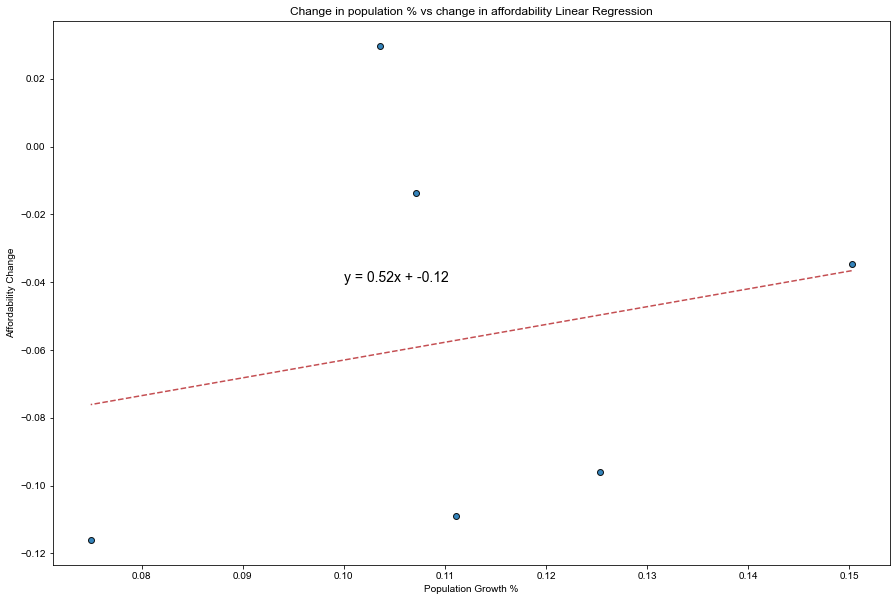

In [41]:
#Linear 
x_values = pd.to_numeric(MSA_top_growth_atl["Population_growth_%"]) #.astype(float)
y_values = pd.to_numeric(MSA_top_growth_atl["Affordability_Change"]) #.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
# plot for northern hemisphere - max temp v/ latitude linear regression
fig1,ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values, y_values, alpha = 0.90, edgecolors = 'k', linewidths = 1)
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq,(.10 ,-.04),fontsize=14)
plt.xlabel("Population Growth %")
plt.ylabel("Affordability Change")
plt.title(f"Change in population % vs change in affordability Linear Regression")
sns.set(style="whitegrid")
#calculations of p/r values
print(f"The P-Value is: {pvalue}")
print(f"The R-Value is: {rvalue}")
print(f"The r-squared is: {rvalue **2}")
#save plot as png
plt.savefig("png1_test", bbox_inches = "tight")
plt.show()

#Save the image
#plt.savefig("../output_data/MaxTempvLinRegSH.png")
 


In [72]:
#Google Maps of our Cities
import gmaps
msa_top_growth_zip_only=msa_top_growth_zip['Zipcode'].reset_index(drop=True)
msa_top_growth_zip_only
URL=f'https://maps.googleapis.com/maps/api/geocode/json?{msa_top_growth_zip_only}=&sensor=true&key=gkey'

#figure = gmaps.figure(zoom_level=3)
figure

Figure(layout=FigureLayout(height='420px'))

In [58]:
msa_top_growth_zip_only=msa_top_growth_zip['Zipcode'].reset_index(drop=True)
msa_top_growth_zip_only

0      27501
1      27502
2      27504
3      27508
4      27511
       ...  
750    78941
751    78950
752    78953
753    78957
754    78959
Name: Zipcode, Length: 755, dtype: int32

The P-Value is: 1.8592708204556643e-19
The R-Value is: 0.32016696049027815
The r-squared is: 0.10250688258958333


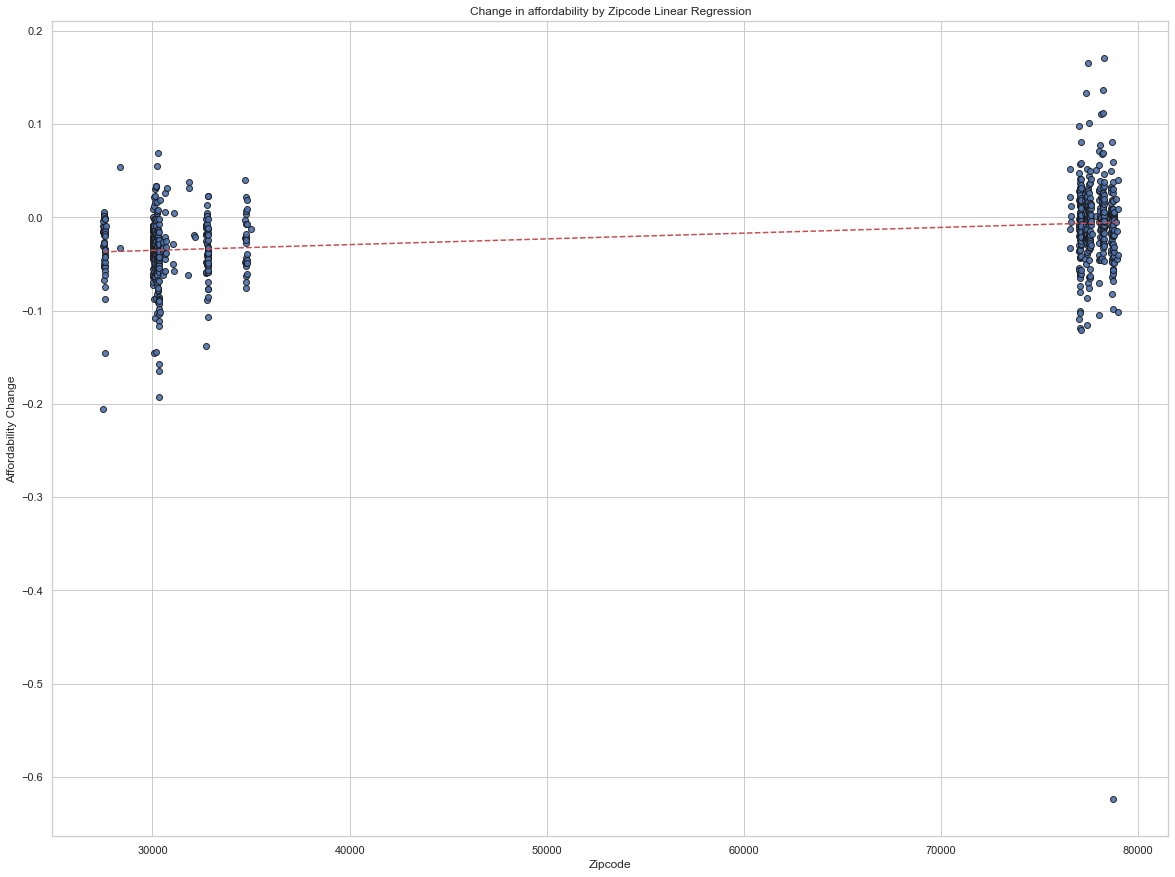

In [83]:
#Linear 
x_values = pd.to_numeric(msa_top_growth_zip["Zipcode"]) #.astype(float)
y_values = pd.to_numeric(msa_top_growth_zip["Change in Affordability"]) #.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
# plot for northern hemisphere - max temp v/ latitude linear regression
fig1,ax1 = plt.subplots(figsize=(20,15))
plt.scatter(x_values, y_values, alpha = 0.90, edgecolors = 'k', linewidths = 1)
plt.plot(x_values, regress_values, "r--")
#plt.annotate(line_eq,(10 ,15),fontsize=14)
plt.xlabel("Zipcode")
plt.ylabel("Affordability Change")
plt.title(f"Change in affordability by Zipcode Linear Regression")
sns.set(style="whitegrid")
#calculations of p/r values
print(f"The P-Value is: {pvalue}")
print(f"The R-Value is: {rvalue}")
print(f"The r-squared is: {rvalue **2}")
#save plot as png
plt.savefig("png1_test", bbox_inches = "tight")
plt.show()

#Save the image
#plt.savefig("../output_data/MaxTempvLinRegSH.png")